In [38]:
import db.knowhere_db as kdb
import pipeline.pipeline as pipeline
import pandas as pd
import numpy as np
from time import time
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from scipy import interp
from itertools import cycle

In [3]:
glen_H_data_raw = pd.read_csv("Labeled_glen_2017-03-19_to_2017-03-23_simplified.csv", index_col=0)

In [4]:
#glen_H_data = glen_H_data_raw[['Acceleration x','Acceleration y','Acceleration z', 'Altimeter (Barometer) Pressure',\
#                               'Microphone Left Channel Level', 'Microphone Right Channel Level','Magnetometer x',\
#                               'Magnetometer y','Magnetometer z','Gyrometer x','Gyrometer y',\
#                               'Gyrometer z', 'classification']]
#glen_H_data = glen_H_data.dropna()
#glen_H_data.iloc[:,0:11].astype(float)

In [5]:
glen_H_data = glen_H_data_raw[['Acceleration x','Acceleration y','Acceleration z',
                               'Magnetometer x','Magnetometer y','Magnetometer z',\
                               'classification']]
#glen_H_data = glen_H_data.dropna()#glen_H_data = glen_H_data.dropna()
glen_H_data.iloc[:,0:6].astype(float)

,Acceleration x,Acceleration y,Acceleration z,Magnetometer x,Magnetometer y,Magnetometer z
2017-03-20 07:33:32,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-20 07:33:33,-0.152821,0.563072,-1.372254,-53.052246,138.553955,-448.443573
2017-03-20 07:33:37,0.377050,0.415137,-0.714468,-53.052246,138.553955,-448.443573
2017-03-20 07:33:42,0.012040,0.095826,-0.189779,-50.648590,118.981277,-439.615295
2017-03-20 07:33:46,0.133631,-0.102296,0.194141,-63.697037,115.890854,-440.596222
2017-03-20 07:33:51,-0.046038,0.116571,0.066937,-103.700851,121.900009,-432.912354
2017-03-20 07:33:55,-0.107973,-0.140334,-0.182697,-89.450562,134.090012,-446.808716
2017-03-20 07:34:00,-0.045027,0.000996,-0.009279,-48.244934,139.584091,-442.558044
2017-03-20 07:34:04,0.091546,-0.424249,-0.222485,-48.244934,139.584091,-442.558044
2017-03-20 07:34:09,-0.001429,0.000199,-0.218771,-54.940842,146.280014,-448.280090


In [6]:
glen_H_data.groupby("classification").size()

classification
D      1107
E        59
S       418
T_D    2107
T_S     435
W      2055
dtype: int64

In [8]:
glen_H_data['Acceleration'] =  np.sqrt(glen_H_data['Acceleration x']**2 + glen_H_data['Acceleration y']**2 +\
                                       glen_H_data['Acceleration z']**2)
glen_H_data['Magnetometer'] =  np.sqrt(glen_H_data['Magnetometer x']**2 + glen_H_data['Magnetometer y']**2 +\
                                       glen_H_data['Magnetometer z']**2)
#glen_H_data['Gyrometer']    =  np.sqrt(glen_H_data['Gyrometer x']**2 + glen_H_data['Gyrometer y']**2 +\
#                                       glen_H_data['Gyrometer z']**2)
#glen_H_data['Microphone']    =  (glen_H_data['Microphone Left Channel Level'] +\
#                                glen_H_data['Microphone Right Channel Level'])/2
#glen_H_data = glen_H_data[['Acceleration','Magnetometer','Gyrometer','Microphone','Altimeter (Barometer) Pressure', 'classification']]
glen_H_data = glen_H_data[['Acceleration', 'Magnetometer', 'classification']]
glen_H_data

KeyError: 'Acceleration x'

In [9]:
# set window 1
window = 2
# Rolling Means
glen_H_data['RollingMeanAcceleration2'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer2'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data['RollingSDAcceleration2'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer2'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()
# Rolling Max
glen_H_data['RollingMeanAcceleration2'] = glen_H_data['Acceleration'].rolling(window=window,center=False).max()
glen_H_data['RollingMaxMagnetometer2'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).max()

# set window 2
window = 5
# Rolling Means
glen_H_data['RollingMeanAcceleration5'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer5'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data['RollingSDAcceleration5'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer5'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()
# Rolling Max
glen_H_data['RollingMeanAcceleration5'] = glen_H_data['Acceleration'].rolling(window=window,center=False).max()
glen_H_data['RollingMaxMagnetometer5'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).max()

# set window 3
window = 7
# Rolling Means
glen_H_data['RollingMeanAcceleration7'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer7'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data['RollingSDAcceleration7'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer7'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()
# Rolling Max
glen_H_data['RollingMeanAcceleration7'] = glen_H_data['Acceleration'].rolling(window=window,center=False).max()
glen_H_data['RollingMaxMagnetometer7'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).max()

# set window 4
window = 10
# Rolling Means
glen_H_data['RollingMeanAcceleration10'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer10'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data['RollingSDAcceleration10'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer10'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()
# Rolling Max
glen_H_data['RollingMeanAcceleration10'] = glen_H_data['Acceleration'].rolling(window=window,center=False).max()
glen_H_data['RollingMaxMagnetometer10'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).max()

# set window 5
window = 15
# Rolling Means
glen_H_data['RollingMeanAcceleration15'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer15'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data['RollingSDAcceleration15'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer15'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()
# Rolling Max
glen_H_data['RollingMeanAcceleration15'] = glen_H_data['Acceleration'].rolling(window=window,center=False).max()
glen_H_data['RollingMaxMagnetometer15'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).max()

In [10]:
glen_H_data = glen_H_data.dropna()
glen_H_data_re = glen_H_data.iloc[:,range(0,2) + range(3,28) + [2]]

In [12]:
# load dataset
dataset = glen_H_data_re.values
X = dataset[:,0:26]
Y = dataset[:,27]
X, Y = shuffle(X, Y, random_state=123)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [13]:
RF_Class = RandomForestClassifier(bootstrap=True,min_samples_leaf=1,n_estimators=1500,\
                                  min_samples_split=2, criterion='gini', max_features=12, max_depth=10)
RF_Class_Up = RandomForestClassifier(bootstrap=True,min_samples_leaf=1,n_estimators=1500,\
                                     min_samples_split=2, criterion='gini', max_features=12, max_depth=20)
GBM = GradientBoostingClassifier(n_estimators=1500)
lr = LogisticRegression(C=1e5)

In [14]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
print('Original dataset shape {}'.format(Counter(encoded_Y)))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, encoded_Y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({3: 2107, 5: 2055, 0: 1093, 4: 435, 2: 418, 1: 59})
Resampled dataset shape Counter({1: 2107, 3: 2107, 5: 2055, 0: 1093, 4: 435, 2: 418})


/Users/gafergus/anaconda/lib/python2.7/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [11]:
x_train,x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=41010392)
RF_Class_Up.fit(x_train,y_train)
RFY_Pred = RF_Class_Up.predict(x_test)
print accuracy_score(y_test,RFY_Pred)
print confusion_matrix(y_test,RFY_Pred)

0.936554776835
[[329   0   0  18   1  35]
 [  0 728   0   0   0   3]
 [  2   0 111   6   0   9]
 [  2   0   0 661   5  17]
 [  2   1   1  31  92   9]
 [  8   7   0  15   0 618]]


In [15]:
RF_Class_Up.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=12, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1500, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

0.87278978389
[[305   0   1  22   2  41]
 [  0   2   0   0   0  24]
 [  8   0 108  15   0  12]
 [  4   0   0 673   9  13]
 [  2   0   4  68  68  16]
 [  4   1   0  13   0 621]]


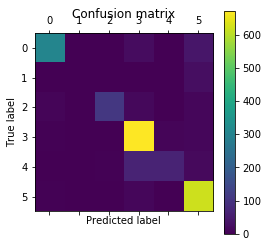

In [14]:
x_train,x_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, random_state=41010392)
RF_Class.fit(x_train,y_train)
RFY_Pred = RF_Class.predict(x_test)
print accuracy_score(y_test,RFY_Pred)
print confusion_matrix(y_test,RFY_Pred)
plt.matshow(confusion_matrix(y_test,RFY_Pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.figure(figsize=(8, 6))
plt.show()

AttributeError: 'module' object has no attribute 'size'

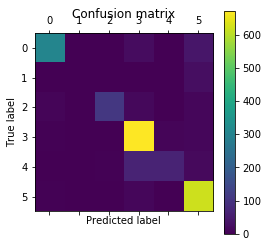

In [22]:
plt.matshow(confusion_matrix(y_test,RFY_Pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.

In [61]:
x_train,x_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, random_state=41010392)
GBM.fit(x_train, y_train)
Y_pred = GBM.predict(x_test)
print accuracy_score(y_test,Y_pred)
print confusion_matrix(y_test,Y_pred)

0.935166994106
[[336   0   1  12   2  20]
 [  0  12   0   0   0  14]
 [  5   0 131   5   0   2]
 [  3   0   1 683   6   6]
 [  1   0   2  34 115   6]
 [  3   1   0   7   1 627]]


/Users/gafergus/anaconda/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 11:30:32.388475. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [62]:
stacked_class = StackingCVClassifier(classifiers= [GBM, RF_Class], 
                                     use_probas=True,
                                     meta_classifier=lr)

/Users/gafergus/anaconda/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 11:31:57.000414. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [63]:
x_train,x_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, random_state=41010392)
stacked_class.fit(x_train, y_train)
Y_pred = stacked_class.predict(x_test)
print accuracy_score(y_test,Y_pred)
print confusion_matrix(y_test,Y_pred)

0.936640471513
[[338   0   1  11   1  20]
 [  0  15   0   0   0  11]
 [  4   0 132   5   0   2]
 [  4   0   1 678  11   5]
 [  0   0   3  31 117   7]
 [  4   1   0   6   1 627]]


/Users/gafergus/anaconda/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 11:31:57.009140. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [41]:
RF_Class.fit(X,encoded_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=12, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1500, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [64]:
GBM.fit(X, encoded_Y)
stacked_class.fit(X, encoded_Y)

StackingCVClassifier(classifiers=[GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_...mators=1500, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)],
           meta_classifier=LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
           n_folds=2, random_state=None, shuffle=True, stratify=True,
           use_features_in_secondary=False, use_probas=True, verbose=0)

/Users/gafergus/anaconda/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 11:39:22.389224. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Best parameters:
- max_depth=20
- max_features=10
- min_samples_split=2
- min_samples_leaf=1


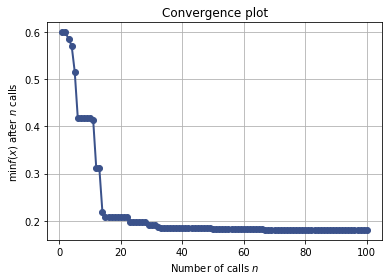

/Users/gafergus/anaconda/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 14:17:06.829301. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [100]:
n_features = X.shape[1]
RF_Class = RandomForestClassifier(n_estimators=200)

def objective(params):
    max_depth, max_features, min_samples_split, min_samples_leaf = params
    
    RF_Class.set_params(max_depth=max_depth,
                   max_features=max_features,
                   min_samples_split=min_samples_split, 
                   min_samples_leaf=min_samples_leaf)
    
    return -np.mean(cross_val_score(RF_Class, X_res, y_res, cv=3, n_jobs=-1,scoring="neg_mean_absolute_error"))


space  = [(1, 20),                           # max_depth
          (1, n_features),                  # max_features
          (2, 100),                         # min_samples_split
          (1, 100)]                         # min_samples_leaf

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=100, random_state=0)

"Best score=%.4f" % res_gp.fun

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1], 
                            res_gp.x[2], res_gp.x[3]))

from skopt.plots import plot_convergence

plot_convergence(res_gp);

In [17]:
glen_H_data_TEST_raw = pd.read_csv('glen_3_24_labeled.csv', index_col=0)
#Use this cell if you want to simplify your labels
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='T_E', value='T_S')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='E_U', value='E')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='E_D', value='E')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='S_U', value='W')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='S_D', value='W')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='T_T', value='T_S')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='T_B', value='T_D')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='P_W', value='W')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='P_S', value='S')
glen_H_data_TEST_raw.groupby("classification").size()

classification
D      150
E        8
S       37
T_D    297
T_S     84
W      255
dtype: int64

In [18]:
glen_H_data_TEST = glen_H_data_TEST_raw[['Acceleration x','Acceleration y','Acceleration z',
                                         'Magnetometer x','Magnetometer y','Magnetometer z',\
                                         'classification']]
glen_H_data_TEST.iloc[:,0:6].astype(float)

,Acceleration x,Acceleration y,Acceleration z,Magnetometer x,Magnetometer y,Magnetometer z
2017-03-24 06:31:10,0.000000,0.000000,0.000000,-65.585632,113.658890,-441.740631
2017-03-24 06:31:15,-0.023296,-0.018811,0.066937,-66.959152,121.556625,-445.337341
2017-03-24 06:31:19,-0.015955,0.008646,0.017675,-66.959152,121.556625,-445.337341
2017-03-24 06:31:24,-0.027630,-0.027705,-0.014916,-62.323517,116.577621,-443.865967
2017-03-24 06:31:28,0.080779,-0.055970,-0.106723,-103.872543,115.204086,-422.612701
2017-03-24 06:31:33,0.242347,0.272881,-0.190725,-56.314362,102.670715,-425.065002
2017-03-24 06:31:37,-0.007537,0.121181,-0.137641,-29.874084,108.851562,-432.912354
2017-03-24 06:31:42,-0.460572,-0.016713,0.077979,-56.486053,103.872543,-387.953552
2017-03-24 06:31:46,-0.029696,-0.123480,-0.279018,-75.543671,166.196075,-541.794373
2017-03-24 06:31:51,-0.035942,0.019347,-0.053827,-3.262100,123.101837,-448.770538


In [19]:
glen_H_data_TEST['Acceleration'] =  np.sqrt(glen_H_data_TEST['Acceleration x']**2 + glen_H_data_TEST['Acceleration y']**2 +\
                                            glen_H_data_TEST['Acceleration z']**2)
glen_H_data_TEST['Magnetometer'] =  np.sqrt(glen_H_data_TEST['Magnetometer x']**2 + glen_H_data_TEST['Magnetometer y']**2 +\
                                            glen_H_data_TEST['Magnetometer z']**2)
glen_H_data_TEST = glen_H_data_TEST[['Acceleration','Magnetometer','classification']]

/Users/gafergus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/gafergus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
# set window 1
window = 2
# Rolling Means
glen_H_data_TEST['RollingMeanAcceleration2'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data_TEST['RollingMeanMagnetometer2'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data_TEST['RollingSDAcceleration2'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).std()
glen_H_data_TEST['RollingSDMagnetometer2'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).std()
# Rolling Max
glen_H_data_TEST['RollingMeanAcceleration2'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).max()
glen_H_data_TEST['RollingMaxMagnetometer2'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).max()

# set window 2
window = 5
# Rolling Means
glen_H_data_TEST['RollingMeanAcceleration5'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data_TEST['RollingMeanMagnetometer5'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data_TEST['RollingSDAcceleration5'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).std()
glen_H_data_TEST['RollingSDMagnetometer5'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).std()
# Rolling Max
glen_H_data_TEST['RollingMeanAcceleration5'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).max()
glen_H_data_TEST['RollingMaxMagnetometer5'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).max()

# set window 3
window = 7
# Rolling Means
glen_H_data_TEST['RollingMeanAcceleration7'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data_TEST['RollingMeanMagnetometer7'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data_TEST['RollingSDAcceleration7'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).std()
glen_H_data_TEST['RollingSDMagnetometer7'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).std()
# Rolling Max
glen_H_data_TEST['RollingMeanAcceleration7'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).max()
glen_H_data_TEST['RollingMaxMagnetometer7'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).max()

# set window 4
window = 10
# Rolling Means
glen_H_data_TEST['RollingMeanAcceleration10'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data_TEST['RollingMeanMagnetometer10'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data_TEST['RollingSDAcceleration10'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).std()
glen_H_data_TEST['RollingSDMagnetometer10'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).std()
# Rolling Max
glen_H_data_TEST['RollingMeanAcceleration10'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).max()
glen_H_data_TEST['RollingMaxMagnetometer10'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).max()

# set window 5
window = 15
# Rolling Means
glen_H_data_TEST['RollingMeanAcceleration15'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data_TEST['RollingMeanMagnetometer15'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data_TEST['RollingSDAcceleration15'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).std()
glen_H_data_TEST['RollingSDMagnetometer15'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).std()
# Rolling Max
glen_H_data_TEST['RollingMeanAcceleration15'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).max()
glen_H_data_TEST['RollingMaxMagnetometer15'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).max()

In [21]:
glen_H_data_TEST1 = glen_H_data_TEST.dropna()
glen_H_data_re_TEST = glen_H_data_TEST1.iloc[:,range(0,2) + range(3,28) + [2]]

In [22]:
# load dataset
dataset = glen_H_data_re_TEST.values
X_Test = dataset[:,0:26]
Y_Test = dataset[:,27]
encoder = LabelEncoder()
encoder.fit(Y_Test)
encoded_Y_Test = encoder.transform(Y_Test)

In [23]:
glen_H_data_re_TEST.groupby("classification").size()

classification
D      150
E        8
S       37
T_D    297
T_S     84
W      241
dtype: int64

In [73]:
Y_pred_TEST_GBM = GBM.predict(X_Test)
print accuracy_score(encoded_Y_Test,Y_pred_TEST_GBM)
print confusion_matrix(encoded_Y_Test,Y_pred_TEST_GBM)

0.575275397797
[[102   0   0  23   4  21]
 [  0   0   0   0   0   8]
 [ 15   0   0   4   0  18]
 [ 36   0   6 224  11  20]
 [  1   0   0   3   1  79]
 [ 58   0   1  36   3 143]]


/Users/gafergus/anaconda/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 11:49:25.910688. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [91]:
Y_TEST_RF = RF_Class.predict(X_Test)
print accuracy_score(encoded_Y_Test,Y_TEST_RF)
print confusion_matrix(encoded_Y_Test,Y_TEST_RF)

0.627906976744
[[ 93   0   0  22   5  30]
 [  0   0   0   0   0   8]
 [  3   0   0   4   0  30]
 [  8   0  16 254   6  13]
 [  0   0   0   6   0  78]
 [ 40   0   0  35   0 166]]


/Users/gafergus/anaconda/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 13:35:52.297703. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [43]:
Y_TEST_RF = RF_Class.predict_proba(X_Test)
print accuracy_score(encoded_Y_Test,Y_TEST_RF)
print confusion_matrix(encoded_Y_Test,Y_TEST_RF)

ValueError: Can't handle mix of multiclass and continuous-multioutput

In [36]:
# Binarize the output
Y = label_binarize(encoded_Y_Test, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y.shape[1]
Y_TEST_RF = RF_Class_Up.predict_proba(X_Test)

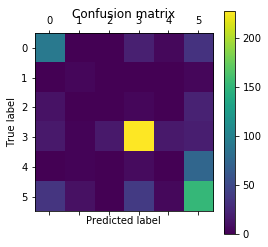

In [30]:
plt.matshow(confusion_matrix(encoded_Y_Test,Y_TEST_RF))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.figure(figsize=(8, 6))
plt.show()

In [75]:
Y_TEST_SC = stacked_class.predict(X_Test)
print accuracy_score(encoded_Y_Test,Y_TEST_SC)
print confusion_matrix(encoded_Y_Test,Y_TEST_SC)

0.571603427173
[[102   0   0  23   4  21]
 [  0   0   0   0   0   8]
 [ 15   0   1   4   0  17]
 [ 35   0   6 222  14  20]
 [  1   0   0   3   1  79]
 [ 58   1   1  35   5 141]]


/Users/gafergus/anaconda/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 11:49:34.891006. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


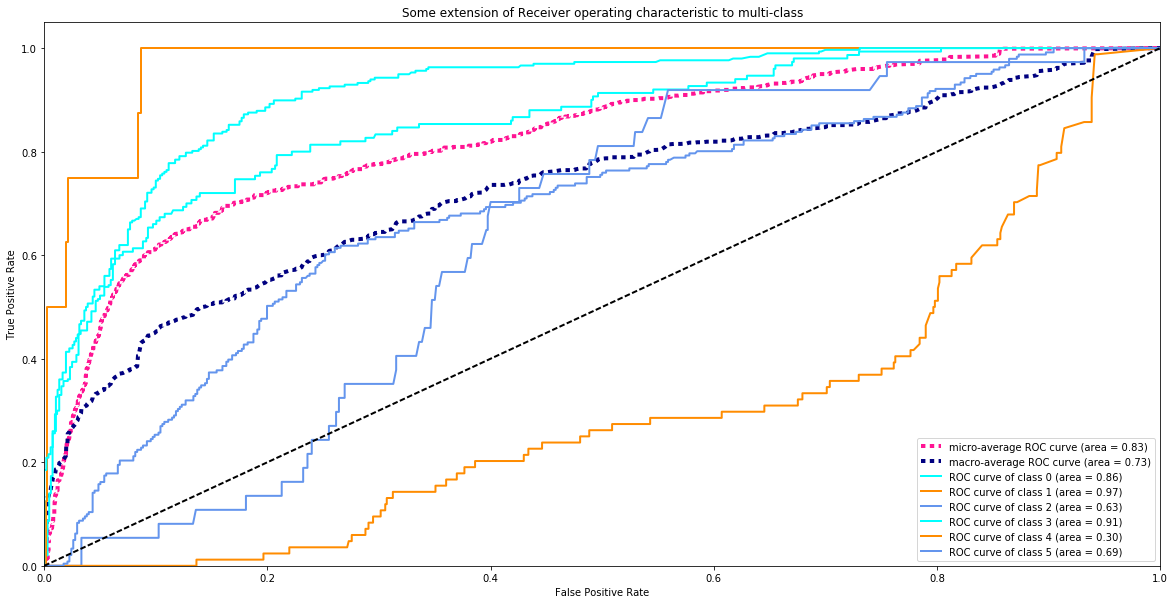

In [39]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y[:, i], Y_TEST_RF[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(Y.ravel(), Y_TEST_RF.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()